<a href="https://colab.research.google.com/github/poojakota17/Connectzoomapi/blob/master/Assisgnment%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework Week 2 : Cluster with GMM and one other Algorithm**

> **Objective**: To find if a person has a heart disease risk or not with their Blood Pressure and Cholestrol values as data points.

**Data** **Preparation**

> To prepare the data to apply kmeans clustering, I analysed the data and removed all the outliers like missing data, null data to get proper clusters.

**How the data set looks like?** 
> First I have uploaded the dataset and then retrieving the csv data using panda's read_csv function. Then the required columns of BP and cholestrol are retrieved using iloc and then I have plotted the data distribution.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv


<bound method NDFrame.head of      Age  Sex  Chest pain type  ...  Number of vessels fluro  Thallium  Heart Disease
0     70    1                4  ...                        3         3       Presence
1     67    0                3  ...                        0         7        Absence
2     57    1                2  ...                        0         7       Presence
3     64    1                4  ...                        1         7        Absence
4     74    0                2  ...                        1         3        Absence
..   ...  ...              ...  ...                      ...       ...            ...
265   52    1                3  ...                        0         7        Absence
266   44    1                2  ...                        0         7        Absence
267   56    0                2  ...                        0         3        Absence
268   57    1                4  ...                        0         6        Absence
269   67    1           

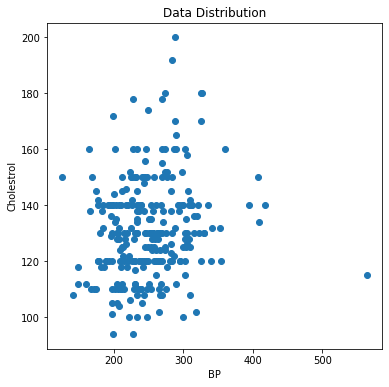

In [110]:
import pandas as pd
import io
import matplotlib.pyplot as plt
X = pd.read_csv(io.StringIO(uploaded['Heart_Disease_Prediction.csv'].decode('utf-8')))
# data=X.iloc[: ,[4,3]].values
print(X.head)
plt.figure(figsize=(6,6))
plt.scatter(X["Cholesterol"],X["BP"])
plt.xlabel('BP')
plt.ylabel('Cholestrol')
plt.title('Data Distribution')
plt.show()

**Clustering with GMM**

> Using scikit learn, I have used Gaussian Mixture and with 2 clusters to find out whether a person is in a high risk for heart disease or a low risk category. 






[[322 130]
 [564 115]
 [261 124]
 [263 128]
 [269 120]
 [177 120]
 [256 130]
 [239 110]
 [293 140]
 [407 150]
 [234 135]
 [226 142]
 [235 140]
 [234 134]
 [303 128]
 [149 112]
 [311 140]
 [203 140]
 [211 110]
 [199 140]
 [229 120]
 [245 130]
 [303 115]
 [204 112]
 [288 132]
 [275 130]
 [243 138]
 [295 120]
 [230 112]
 [265 110]
 [229 128]
 [228 160]
 [215 120]
 [326 170]
 [200 144]
 [256 130]
 [207 140]
 [273 160]
 [180 130]
 [222 122]
 [223 152]
 [209 124]
 [233 130]
 [197 101]
 [218 126]
 [211 140]
 [149 118]
 [197 110]
 [246 160]
 [225 150]
 [315 136]
 [205 128]
 [417 140]
 [195 140]
 [234 130]
 [198 105]
 [166 138]
 [178 120]
 [249 174]
 [281 120]
 [126 150]
 [305 130]
 [226 120]
 [240 150]
 [233 145]
 [276 150]
 [261 140]
 [319 136]
 [242 118]
 [243 108]
 [260 120]
 [354 120]
 [245 156]
 [197 140]
 [223 106]
 [309 142]
 [208 104]
 [199  94]
 [209 120]
 [236 120]
 [218 146]
 [198 120]
 [270 150]
 [214 130]
 [201 110]
 [244 148]
 [208 128]
 [270 178]
 [306 126]
 [243 150]
 [221 140]

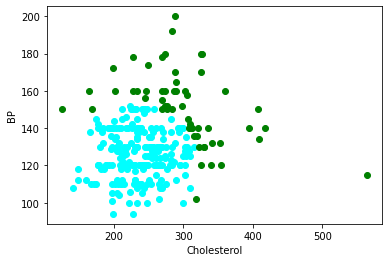

In [111]:
import pandas as pd
import io
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import  silhouette_samples
X = pd.read_csv(io.StringIO(uploaded['Heart_Disease_Prediction.csv'].decode('utf-8')))

data=X.iloc[: ,[4,3]].values
print(data)
y=X.iloc[:,]
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2,covariance_type='full')
gmm.fit(data)
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Cholesterol', 'BP', 'cluster']
print(labels)
score = silhouette_score(b, labels, metric='euclidean')
print(score)
# score = adjusted_rand_score(y, y_cluster_kmeans)
color=['cyan','green']
for k in range(0,2):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Cholesterol"],data["BP"],c=color[k])
plt.ylabel('BP')
plt.xlabel('Cholesterol')
plt.show()

**Interpretation**

> From the above graph we can see that, the cyan colored cluster are the people with low risk of heart disease and the green colored cluster are people with a high risk of heart disease. The denser cluster is the one which signify low riskWe We can also see there are some outliers like someone with a lower cholestrol but with blood pressure 150 is also at high risk. Also people with >500 cholestrol and a lower blood pressure is also at risk. In general, people with more than a cholestrol value of 300 or a blood pressure value of more than 140 are at a higher risk of heart disease or a combination of both are at a higher risk.

**Implementing Agglomerative Clustering using Sklearn**

> With similar number of clusters and dataset, agglomerative clustering is implemented.

[['70' '1' '4' ... '3' '3' 'Presence']
 ['67' '0' '3' ... '0' '7' 'Absence']
 ['57' '1' '2' ... '0' '7' 'Presence']
 ...
 ['56' '0' '2' ... '0' '3' 'Absence']
 ['57' '1' '4' ... '0' '6' 'Absence']
 ['67' '1' '4' ... '3' '3' 'Presence']]
[[232.57918552 130.96832579]
 [326.69387755 133.04081633]]
[1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0]
0.47272287558530957


Text(0.5, 0, 'Cholesterol')

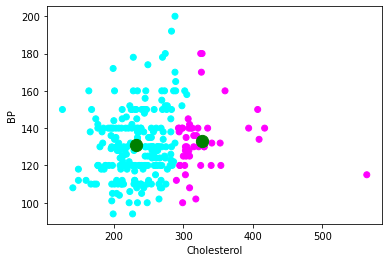

In [109]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from numpy import  genfromtxt
from sklearn.metrics import silhouette_score
from sklearn.metrics import  silhouette_samples
from sklearn.neighbors.nearest_centroid import NearestCentroid
data= genfromtxt("Heart_Disease_Prediction.csv", delimiter=',',encoding='utf8',dtype=np.str,skip_header=1)
print(data)
data_req = data[:, [4, 3]]
# print(data_req)
b = np.asarray(data_req, dtype=np.float64, order='C')
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y=cluster.fit_predict(b)
clf=NearestCentroid()
clf.fit(b,y)
print(clf.centroids_)
print(cluster.labels_)
score = silhouette_score(b, cluster.labels_, metric='euclidean')
print(score)
plt.scatter(b[:,0],b[:,1], c=cluster.labels_, cmap='cool')
plt.scatter(clf.centroids_[:,0], clf.centroids_[:,1], marker="o", color='g',s=150)
plt.ylabel('BP')
plt.xlabel('Cholesterol')

**Interpretation**

> With agglomerative clustering we can see that similar to kmeans it considers all the nearest data points into the cluster with centroid as the center and does not account for other shapes. Some outliers also got mis-clustered. It got a clear cut partition without consideration for outliers.Also compared to kmeans, the centroid values are higher in agglomerative clustering. More data points got added to the low-risk for heart disease cluster than the higher risk one compared to kmeans and GMM even though their data points suggests high risk.

**Clustering with kmeans**




In [77]:
pip install seaborn

[[322 130]
 [564 115]
 [261 124]
 [263 128]
 [269 120]
 [177 120]
 [256 130]
 [239 110]
 [293 140]
 [407 150]
 [234 135]
 [226 142]
 [235 140]
 [234 134]
 [303 128]
 [149 112]
 [311 140]
 [203 140]
 [211 110]
 [199 140]
 [229 120]
 [245 130]
 [303 115]
 [204 112]
 [288 132]
 [275 130]
 [243 138]
 [295 120]
 [230 112]
 [265 110]
 [229 128]
 [228 160]
 [215 120]
 [326 170]
 [200 144]
 [256 130]
 [207 140]
 [273 160]
 [180 130]
 [222 122]
 [223 152]
 [209 124]
 [233 130]
 [197 101]
 [218 126]
 [211 140]
 [149 118]
 [197 110]
 [246 160]
 [225 150]
 [315 136]
 [205 128]
 [417 140]
 [195 140]
 [234 130]
 [198 105]
 [166 138]
 [178 120]
 [249 174]
 [281 120]
 [126 150]
 [305 130]
 [226 120]
 [240 150]
 [233 145]
 [276 150]
 [261 140]
 [319 136]
 [242 118]
 [243 108]
 [260 120]
 [354 120]
 [245 156]
 [197 140]
 [223 106]
 [309 142]
 [208 104]
 [199  94]
 [209 120]
 [236 120]
 [218 146]
 [198 120]
 [270 150]
 [214 130]
 [201 110]
 [244 148]
 [208 128]
 [270 178]
 [306 126]
 [243 150]
 [221 140]

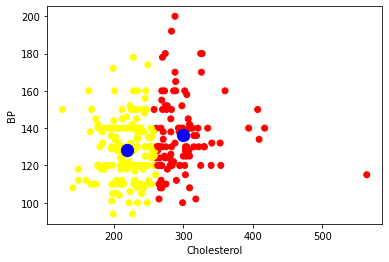

In [113]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import  silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
import io

df = pd.read_csv(io.StringIO(uploaded['Heart_Disease_Prediction.csv'].decode('utf-8')))
df 
X=df.iloc[:,[4,3]].values
print(X)
kmeans=KMeans(n_clusters=2, init='k-means++', max_iter= 80, n_init= 10, random_state= 0)
y=kmeans.fit_predict(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
centers=kmeans.cluster_centers_
plt.ylabel('BP')
plt.xlabel('Cholesterol')
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_,cmap="autumn")
plt.scatter(centers[:,0], centers[:,1], marker="o", color='b',s=150)
print('Silhouette Score: %.3f' % score)
# scores = silhouette_samples(X, y)
# sns.distplot(scores);

**Comparison of kmeans with GMM and Agglomerative Clustering**

> kmeans does a hard clustering, while gmm does a soft clustering. kmeans and agglomerative clustering almost partitioned the data set into nearly round clusters.
> GMM has a low silhouettte score compared to kmeans and agglomerative clustering and many outliers also get allocated to a different cluster compared to kmeans. People with a BP range of 140 but a low Cholesterol level came under the high risk category, which is not a general case.Hence, for this data set k-means works better. 

> With agglomerative clustering we get a similar silhouette score as that of k-means, even people with BP as high as 200 and Cholesterol more than 250 also came under the low risk category, which are not the normal range as per medical science. 

> K-means are generally good for data distributions which are circular. This data distribution is circular so it works well with it and divides it into people with high and low risk of heart disease. It also does hard clustering. We can see almost circular partitions with their centers as the kmean centroids and data points in their radius.

>  As per medical science, ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg. high blood pressure is considered to be 140/90mmHg. Normal cholesterol level is between 125 mg/dL to 200 mg/dL.  So people with above these ranges come under high risk for heart disease. As per this information, kmeans creates a better cluster for this data set.

